In [33]:
#Add parent and grandparent folder to sys.path and get variable name
import os
import sys
import inspect

parentdir = os.path.abspath('..')
grandparentdir=os.path.dirname(parentdir)
sys.path.insert(0, parentdir)
sys.path.insert(0, grandparentdir)

var_name=os.path.basename(parentdir)

var_name


'deminit_trde_freight_mt_km'

In [34]:
import pandas as pd
import numpy as np

df_countries=pd.read_csv("../row_data/Countries_ISO3.csv")
df_countries

,Country Name,ISO3
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO
...,...,...
261,Kosovo,XKX
262,"Yemen, Rep.",YEM
263,South Africa,ZAF
264,Zambia,ZMB


In [35]:
#df_freight=pd.read_csv("../row_data/DP_LIVE_18012023235438219.csv")
df_freight=pd.read_csv("../row_data/imputated_freight_data.csv")
df_freight=df_freight.fillna(0)
df_freight

,SUBJECT,LOCATION,TIME,Value,INDICATOR,MEASURE,FREQUENCY
0,COAST,GEO,2019,545.610000,FREIGHTTRANSP,MLN_TONNEKM,A
1,COAST,ABW,2019,12602.749312,FREIGHTTRANSP,MLN_TONNEKM,A
2,COAST,IRQ,2018,38673.631374,FREIGHTTRANSP,MLN_TONNEKM,A
3,COAST,MNE,2017,81.600000,FREIGHTTRANSP,MLN_TONNEKM,A
4,COAST,ETH,2017,23472.878076,FREIGHTTRANSP,MLN_TONNEKM,A
...,...,...,...,...,...,...,...
7035,ROAD,ZWE,2020,20942.431598,FREIGHTTRANSP,MLN_TONNEKM,A
7036,ROAD,OMN,2013,57314.294170,FREIGHTTRANSP,MLN_TONNEKM,A
7037,ROAD,HND,2017,24663.193117,FREIGHTTRANSP,MLN_TONNEKM,A
7038,ROAD,ZWE,2021,21381.730080,FREIGHTTRANSP,MLN_TONNEKM,A


In [36]:
set(df_freight['SUBJECT'].values)

{'COAST', 'INLAND', 'RAIL', 'ROAD'}

In [37]:
years_hist = range(2011,2021)
iso_year_subject=[]
incomplete_iso_year_subject=[]
iso_subject_mean=[]

for iso3 in set(df_freight['LOCATION'].values):
    for sub in set(df_freight['SUBJECT'].values):
        mean_array=[]
        for year in years_hist:
            if (iso3,year,sub) in zip(df_freight['LOCATION'].values,df_freight['TIME'].values,df_freight['SUBJECT'].values):
                
                value=df_freight.loc[(df_freight['LOCATION']==iso3)&
                                    (df_freight['TIME']==year)&
                                    (df_freight['SUBJECT']==sub)]['Value'].values[0]
                
                iso_year_subject.append([iso3,year,sub,value])
                
                mean_array.append(value)
            else:
                value=0
                incomplete_iso_year_subject.append([iso3,year,sub,value])
        if len(mean_array)!=0:
            mean_val=np.mean(mean_array)
            iso_subject_mean.append([iso3,sub,mean_val])

complete_df=pd.DataFrame(iso_year_subject, columns=['iso_code3','Year','Subject','Value'])
incomplete_df=pd.DataFrame(incomplete_iso_year_subject, columns=['iso_code3','Year','Subject','Value'])
mean_df=pd.DataFrame(iso_subject_mean, columns=['iso_code3','Subject','Value'])
mean_df=mean_df[mean_df.Value != 0]


In [38]:
complete_df

,iso_code3,Year,Subject,Value
0,ESP,2011,ROAD,206840.000000
1,ESP,2012,ROAD,199205.000000
2,ESP,2013,ROAD,192594.000000
3,ESP,2014,ROAD,195763.000000
4,ESP,2015,ROAD,209387.000000
...,...,...,...,...
6395,SLV,2016,RAIL,14064.843332
6396,SLV,2017,RAIL,14068.247213
6397,SLV,2018,RAIL,14071.968940
6398,SLV,2019,RAIL,14076.124548


In [39]:
incomplete_df

,iso_code3,Year,Subject,Value


In [40]:
mean_df

,iso_code3,Subject,Value
0,ESP,ROAD,218269.800000
1,ESP,COAST,45121.900000
2,ESP,INLAND,237668.660000
3,ESP,RAIL,10083.560000
4,MOZ,ROAD,19947.172897
...,...,...,...
635,STP,RAIL,12820.585513
636,SLV,ROAD,26186.705136
637,SLV,COAST,9134.897141
638,SLV,INLAND,35321.602277


In [41]:
mean_df[mean_df['iso_code3']=='CHL'],11278.719321+3866.503193

(   iso_code3 Subject          Value
 76       CHL    ROAD   44232.709137
 77       CHL   COAST   25835.602470
 78       CHL  INLAND  194473.835884
 79       CHL    RAIL    3869.790210,
 15145.222514000001)

In [42]:
df_pop=pd.read_csv("../row_data/API_SP.POP.TOTL_DS2_en_csv_v2_4019998.csv")
df_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN


In [43]:
df_wbig=pd.read_csv("../row_data/wbig_for_mateo.csv",encoding = "ISO-8859-1")
df_wbig.replace(to_replace='China (P.R. of China and Hong Kong, China)', value='China',inplace=True)
df_wbig.replace(to_replace='Czech Republic', value='Czechia',inplace=True)
df_wbig.replace(to_replace='Korea', value='Korea, Rep.',inplace=True)
df_wbig.replace(to_replace='Republic of Moldova', value='Moldova',inplace=True)
df_wbig.replace(to_replace='Former Yugoslav Republic of Macedonia', value='North Macedonia',inplace=True)
df_wbig.replace(to_replace='Turkey', value='Turkiye',inplace=True)
df_wbig.replace(to_replace='Montenegro', value='MN',inplace=True)
df_wbig

,COUNTRY,FLOW,UNIT,TIME,Total
0,World,Transport,TJ,1960,..
1,World,Transport,TJ,1961,..
2,World,Transport,TJ,1962,..
3,World,Transport,TJ,1963,..
4,World,Transport,TJ,1964,..
...,...,...,...,...,...
10319,Memo: G20,Transport,TJ,2013,75580141
10320,Memo: G20,Transport,TJ,2014,76470958
10321,Memo: G20,Transport,TJ,2015,78859453
10322,Memo: G20,Transport,TJ,2016,80259152


In [44]:
#### HISTORICAL ######

#countries=df_countries['Country Name'].values
#ISO3=np.unique(df_countries['ISO3'].values)

ISO3=sorted(set(df_freight['LOCATION'].values))

years=sorted(set((df_freight['TIME'].values)))
#years=range(2011,2017)

coun_year=[]
for iso3 in ISO3:
    country=df_countries[df_countries['ISO3']==iso3]['Country Name'].values[0]
    for year in years:
        coun_year.append([country,iso3,year])
df_historical_out = pd.DataFrame(coun_year, columns=['Nation','iso_code3', 'Year'])
df_historical_out[var_name]=0
df_historical_out

,Nation,iso_code3,Year,deminit_trde_freight_mt_km
0,Aruba,ABW,2011,0
1,Aruba,ABW,2012,0
2,Aruba,ABW,2013,0
3,Aruba,ABW,2014,0
4,Aruba,ABW,2015,0
...,...,...,...,...
1755,Zimbabwe,ZWE,2017,0
1756,Zimbabwe,ZWE,2018,0
1757,Zimbabwe,ZWE,2019,0
1758,Zimbabwe,ZWE,2020,0


In [45]:
np.unique(df_freight['SUBJECT'])

array(['COAST', 'INLAND', 'RAIL', 'ROAD'], dtype=object)

In [46]:
# N=len(np.unique(df_freight['LOCATION'].values))
# mean_value_oecd={}
# for y in years:
#     m=0
#     vect=[]
#     for c in np.unique(df_freight['LOCATION'].values):
#         try:
#             RAIL_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='RAIL')
#                   ]['Value'].values[0]
#             #print('rail')
#         except:
#             RAIL_data=0
            
#         try:
#             ROAD_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='ROAD')
#                   ]['Value'].values[0]
#             #print('road')
#         except:
#             ROAD_data=0
        
#         try:
#             INLAND_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='INLAND')
#                   ]['Value'].values[0]
#             #print('inland')
#         except:
#             INLAND_data=0
#         try:
#             COAST_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='COAST')
#                   ]['Value'].values[0]
#             #print('coast')
#         except:
#             COAST_data=0
        
#         #m+=RAIL_data+ROAD_data+INLAND_data+COAST_data
#         #m+=RAIL_data+ROAD_data+COAST_data
#         vect.append(float(RAIL_data+ROAD_data+INLAND_data+COAST_data))
        
#     vect2=[v for v in vect if v!=0]
#     #mean_value_oecd is quantile 25
# #     mean_value_oecd[y]=np.quantile(vect2,0.25)
        
# # mean_value_oecd

In [47]:
# mean_value_oecd_perTJ={}
# for y in years:
#     m=0
#     N_TJ=0
#     vect=[]
#     for c in np.unique(df_freight['LOCATION'].values):
#         try:
#             RAIL_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='RAIL')
#                   ]['Value'].values[0]
#             #print('rail')
#         except:
#             RAIL_data=0
            
#         try:
#             ROAD_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='ROAD')
#                   ]['Value'].values[0]
#             #print('road')
#         except:
#             ROAD_data=0
        
#         try:
#             INLAND_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='INLAND')
#                   ]['Value'].values[0]
#             #print('inland')
#         except:
#             INLAND_data=0
#         try:
#             COAST_data=df_freight.loc[(df_freight['LOCATION']==c) &
#                                  (df_freight['TIME']==y) &
#                                  (df_freight['SUBJECT']=='COAST')
#                   ]['Value'].values[0]
#             #print('coast')
#         except:
#             COAST_data=0
            
#         try:

#             country= df_countries.loc[df_countries['ISO3']==c]['Country Name'].values[0]

#             country_TJ= float(df_wbig.loc[(df_wbig['COUNTRY']==country) &
#                                           (df_wbig['TIME']==y)]['Total'].values[0]
#                              )
#             #m+=(RAIL_data+ROAD_data+INLAND_data+COAST_data)/country_TJ
#             vect.append((float(RAIL_data+ROAD_data+INLAND_data+COAST_data))/country_TJ)
#         except:
#             #debug country names with:
#             #print(country)
#             pass
#         vect2=[v for v in vect if v!=0]
#         mean_value_oecd_perTJ[y]=np.mean(vect2)
        
# mean_value_oecd_perTJ

In [48]:
nation_in_df=df_freight['LOCATION'].values

year_in_df=df_freight['TIME'].values

for count,year in zip(df_historical_out['iso_code3'].values,df_historical_out['Year'].values):
    #if (count,year) in zip(nation_in_df,year_in_df):
    if (count,year) in zip(nation_in_df,year_in_df):
        try:
            RAIL_data=df_freight.loc[(df_freight['LOCATION']==count) &
                                 (df_freight['TIME']==year) &
                   (df_freight['SUBJECT']=='RAIL')
                  ]['Value'].values[0]
        except:
            try:
                RAIL_data=mean_df.loc[(mean_df['iso_code3']==count)&
                            (mean_df['Subject']=='RAIL')]['Value'].values[0]
            except:
                RAIL_data=0
        
        try:
            ROAD_data=df_freight.loc[(df_freight['LOCATION']==count) &
                                 (df_freight['TIME']==year) &
                   (df_freight['SUBJECT']=='ROAD')
                  ]['Value'].values[0]
        except:
            try:
                ROAD_data=mean_df.loc[(mean_df['iso_code3']==count)&
                            (mean_df['Subject']=='ROAD')]['Value'].values[0]
            except:
                ROAD_data=0
        
        try:
            INLAND_data=df_freight.loc[(df_freight['LOCATION']==count) &
                                 (df_freight['TIME']==year) &
                   (df_freight['SUBJECT']=='INLAND')
                  ]['Value'].values[0]
        except:
            try:
                INLAND_data=mean_df.loc[(mean_df['iso_code3']==count)&
                            (mean_df['Subject']=='INLAND')]['Value'].values[0]
            except:
                INLAND_data=0
        
        try:
            COAST_data=df_freight.loc[(df_freight['LOCATION']==count) &
                                 (df_freight['TIME']==year) &
                   (df_freight['SUBJECT']=='COAST')
                  ]['Value'].values[0]
        except:
            try:
                COAST_data=mean_df.loc[(mean_df['iso_code3']==count)&
                            (mean_df['Subject']=='COAST')]['Value'].values[0]
            except:
                COAST_data=0
        
        dato=RAIL_data+ROAD_data+INLAND_data+COAST_data
        
        #dato=RAIL_data+ROAD_data+COAST_data
        
        df_historical_out.loc[(df_historical_out['iso_code3'] == count) & 
                        (df_historical_out['Year']== year), var_name] = dato 
    else:
        
        try:
            country= df_countries.loc[df_countries['ISO3']==count]['Country Name'].values[0]
            
            country_TJ= df_wbig.loc[(df_wbig['COUNTRY']==country) & (df_wbig['TIME']==year)]['Total'].values[0]
            
            dato=mean_value_oecd_perTJ[year]*float(country_TJ)
            df_historical_out.loc[(df_historical_out['iso_code3'] == count) & 
                        (df_historical_out['Year']== year), var_name] = dato
        except:
            
            dato=mean_value_oecd[year]
            df_historical_out.loc[(df_historical_out['iso_code3'] == count) & 
                        (df_historical_out['Year']== year), var_name] = dato
        
df_historical_out

,Nation,iso_code3,Year,deminit_trde_freight_mt_km
0,Aruba,ABW,2011,88108.235145
1,Aruba,ABW,2012,88193.110006
2,Aruba,ABW,2013,52479.986660
3,Aruba,ABW,2014,52480.405020
4,Aruba,ABW,2015,52479.033383
...,...,...,...,...
1755,Zimbabwe,ZWE,2017,68254.017978
1756,Zimbabwe,ZWE,2018,68085.621202
1757,Zimbabwe,ZWE,2019,67902.398079
1758,Zimbabwe,ZWE,2020,67697.627724


In [49]:
df_historical_out.loc[df_historical_out['iso_code3']=='CHL']

,Nation,iso_code3,Year,deminit_trde_freight_mt_km
319,Chile,CHL,2011,216643.092454
320,Chile,CHL,2012,235406.223541
321,Chile,CHL,2013,254050.764811
322,Chile,CHL,2014,272862.113755
323,Chile,CHL,2015,291373.430195
324,Chile,CHL,2016,296840.856192
325,Chile,CHL,2017,270982.257455
326,Chile,CHL,2018,279338.454951
327,Chile,CHL,2019,282212.307247
328,Chile,CHL,2020,284409.876407


In [50]:
#### Projected ######

#countries=df_countries['Country Name'].values
ISO3=sorted(set(df_freight['LOCATION'].values))

years=sorted(set((df_freight['TIME'].values)))
years2=range(max(years)+1,2051)

coun_year=[]
for iso3 in ISO3:
    country=df_countries[df_countries['ISO3']==iso3]['Country Name'].values[0]
    for year in years2:
        coun_year.append([country,iso3,year])
df_projected_out = pd.DataFrame(coun_year, columns=['Nation','iso_code3', 'Year'])
df_projected_out[var_name]=0
df_projected_out

,Nation,iso_code3,Year,deminit_trde_freight_mt_km
0,Aruba,ABW,2022,0
1,Aruba,ABW,2023,0
2,Aruba,ABW,2024,0
3,Aruba,ABW,2025,0
4,Aruba,ABW,2026,0
...,...,...,...,...
4635,Zimbabwe,ZWE,2046,0
4636,Zimbabwe,ZWE,2047,0
4637,Zimbabwe,ZWE,2048,0
4638,Zimbabwe,ZWE,2049,0


In [51]:
for count,year in zip(df_projected_out['Nation'].values,df_projected_out['Year'].values):
    df_dato=df_historical_out[(df_historical_out['Nation']==count) & 
                               (df_historical_out['Year']==max(years))]
    dato=df_dato[var_name].values[0]
    df_projected_out.loc[(df_projected_out['Nation'] == count) & 
                        (df_projected_out['Year']== year), var_name] = dato
df_projected_out

,Nation,iso_code3,Year,deminit_trde_freight_mt_km
0,Aruba,ABW,2022,88348.985102
1,Aruba,ABW,2023,88348.985102
2,Aruba,ABW,2024,88348.985102
3,Aruba,ABW,2025,88348.985102
4,Aruba,ABW,2026,88348.985102
...,...,...,...,...
4635,Zimbabwe,ZWE,2046,69117.685606
4636,Zimbabwe,ZWE,2047,69117.685606
4637,Zimbabwe,ZWE,2048,69117.685606
4638,Zimbabwe,ZWE,2049,69117.685606


In [52]:
df_historical_out.to_csv('../input_to_sisepuede/historical/'+var_name+'.csv')

In [53]:
df_projected_out.to_csv('../input_to_sisepuede/projected/'+var_name+'.csv')

Text(0.5, 1.0, '2016')

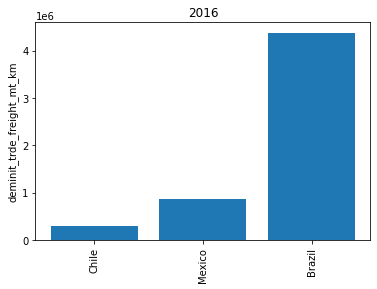

In [54]:
year=2016
Chile_2016=df_historical_out[(df_historical_out['Nation']=='Chile')&(df_historical_out['Year']==year)][var_name].values[0]
Mexico_2016=df_historical_out[(df_historical_out['Nation']=='Mexico')&(df_historical_out['Year']==year)][var_name].values[0]
Brazil_2016=df_historical_out[(df_historical_out['Nation']=='Brazil')&(df_historical_out['Year']==year)][var_name].values[0]
labels=['Chile','Mexico','Brazil']
x=[1,2,3]
import matplotlib.pyplot as plt
plt.bar(x,[Chile_2016,Mexico_2016,Brazil_2016])
plt.xticks(x, labels, rotation='vertical')
plt.ylabel(var_name)
plt.title(str(year))


In [55]:
df_wbig[df_wbig['COUNTRY']=='Chile']

,COUNTRY,FLOW,UNIT,TIME,Total
1972,Chile,Transport,TJ,1960,..
1973,Chile,Transport,TJ,1961,..
1974,Chile,Transport,TJ,1962,..
1975,Chile,Transport,TJ,1963,..
1976,Chile,Transport,TJ,1964,..
1977,Chile,Transport,TJ,1965,..
1978,Chile,Transport,TJ,1966,..
1979,Chile,Transport,TJ,1967,..
1980,Chile,Transport,TJ,1968,..
1981,Chile,Transport,TJ,1969,..


In [56]:
df_freight[df_freight['LOCATION']=='CHL'].to_csv('Chile_OECD_historic.csv')

In [57]:
df_freight[df_freight['LOCATION']=='CHL']

,SUBJECT,LOCATION,TIME,Value,INDICATOR,MEASURE,FREQUENCY
19,COAST,CHL,2011,29728.931971,FREIGHTTRANSP,MLN_TONNEKM,A
28,COAST,CHL,2013,34608.193582,FREIGHTTRANSP,MLN_TONNEKM,A
160,COAST,CHL,2015,39476.367328,FREIGHTTRANSP,MLN_TONNEKM,A
215,COAST,CHL,2019,12442.000000,FREIGHTTRANSP,MLN_TONNEKM,A
331,COAST,CHL,2017,10005.000000,FREIGHTTRANSP,MLN_TONNEKM,A
334,COAST,CHL,2018,13658.000000,FREIGHTTRANSP,MLN_TONNEKM,A
431,COAST,CHL,2012,32176.296895,FREIGHTTRANSP,MLN_TONNEKM,A
463,COAST,CHL,2020,9009.877284,FREIGHTTRANSP,MLN_TONNEKM,A
693,COAST,CHL,2016,40189.509850,FREIGHTTRANSP,MLN_TONNEKM,A
714,COAST,CHL,2021,61629.203850,FREIGHTTRANSP,MLN_TONNEKM,A


In [58]:
df_historical_out[df_historical_out['Nation']=='Chile']

,Nation,iso_code3,Year,deminit_trde_freight_mt_km
319,Chile,CHL,2011,216643.092454
320,Chile,CHL,2012,235406.223541
321,Chile,CHL,2013,254050.764811
322,Chile,CHL,2014,272862.113755
323,Chile,CHL,2015,291373.430195
324,Chile,CHL,2016,296840.856192
325,Chile,CHL,2017,270982.257455
326,Chile,CHL,2018,279338.454951
327,Chile,CHL,2019,282212.307247
328,Chile,CHL,2020,284409.876407


In [59]:
df_freight.loc[(df_freight['LOCATION']==count) &
                                 (df_freight['TIME']==year) &
                   (df_freight['SUBJECT']=='RAIL')]

,SUBJECT,LOCATION,TIME,Value,INDICATOR,MEASURE,FREQUENCY


In [60]:
count,year

('Zimbabwe', 2016)

In [61]:
df_freight['TIME']

0       2019
1       2019
2       2018
3       2017
4       2017
        ... 
7035    2020
7036    2013
7037    2017
7038    2021
7039    2015
Name: TIME, Length: 7040, dtype: int64

In [62]:
df_freight

,SUBJECT,LOCATION,TIME,Value,INDICATOR,MEASURE,FREQUENCY
0,COAST,GEO,2019,545.610000,FREIGHTTRANSP,MLN_TONNEKM,A
1,COAST,ABW,2019,12602.749312,FREIGHTTRANSP,MLN_TONNEKM,A
2,COAST,IRQ,2018,38673.631374,FREIGHTTRANSP,MLN_TONNEKM,A
3,COAST,MNE,2017,81.600000,FREIGHTTRANSP,MLN_TONNEKM,A
4,COAST,ETH,2017,23472.878076,FREIGHTTRANSP,MLN_TONNEKM,A
...,...,...,...,...,...,...,...
7035,ROAD,ZWE,2020,20942.431598,FREIGHTTRANSP,MLN_TONNEKM,A
7036,ROAD,OMN,2013,57314.294170,FREIGHTTRANSP,MLN_TONNEKM,A
7037,ROAD,HND,2017,24663.193117,FREIGHTTRANSP,MLN_TONNEKM,A
7038,ROAD,ZWE,2021,21381.730080,FREIGHTTRANSP,MLN_TONNEKM,A


In [63]:
ISO3

['ABW',
 'AFG',
 'AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BIH',
 'BLR',
 'BLZ',
 'BOL',
 'BRA',
 'BRB',
 'BRN',
 'BTN',
 'BWA',
 'CAF',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CMR',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYP',
 'DEU',
 'DJI',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FJI',
 'FRA',
 'GAB',
 'GBR',
 'GEO',
 'GHA',
 'GIN',
 'GNB',
 'GNQ',
 'GRC',
 'GTM',
 'GUY',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KHM',
 'KWT',
 'LBN',
 'LBR',
 'LBY',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NCL',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'PNG',
 'POL',
 'PRI',
 'PRT',
 'PRY',
 'PYF',
 'QAT',
 'ROU',
 'RUS',
 'RWA',


In [64]:
years

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]